<a href="https://colab.research.google.com/github/nakul-c/LULC_Prediction/blob/main/XGBOOST_2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rasterio
!pip install geopandas
!pip install xgboost
!pip install pyproj
!pip install imagecodecs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.6/39.6 MB 19.2 MB/s eta 0:00:00


In [ ]:
import rasterio
from rasterio.plot import show
import xgboost as xgb
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
import pandas as pd
import seaborn as sns
import geopandas as gpd
import pyproj

In [ ]:
path_img = '/content/drive/MyDrive/2018_Classification/2018_sentinel_2.tif'
src = rasterio.open(path_img)

In [ ]:
img = src.read()

In [ ]:
img

array([[[0.07135, 0.0657 , 0.0657 , ..., 0.10505, 0.09975, 0.09975],
        [0.07135, 0.0657 , 0.0657 , ..., 0.10505, 0.09975, 0.09975],
        [0.07135, 0.0657 , 0.0657 , ..., 0.1061 , 0.1021 , 0.1021 ],
        ...,
        [0.08645, 0.08645, 0.08645, ..., 0.0848 , 0.08245, 0.08245],
        [0.08645, 0.08645, 0.08645, ..., 0.08255, 0.08025, 0.08025],
        [0.08645, 0.08645, 0.08645, ..., 0.08255, 0.08025, 0.08025]],

       [[0.06725, 0.065  , 0.065  , ..., 0.1086 , 0.1127 , 0.1134 ],
        [0.0697 , 0.0677 , 0.0677 , ..., 0.11405, 0.11025, 0.10975],
        [0.07085, 0.0699 , 0.0699 , ..., 0.114  , 0.1124 , 0.1113 ],
        ...,
        [0.0995 , 0.0996 , 0.09975, ..., 0.0865 , 0.084  , 0.08485],
        [0.0962 , 0.0987 , 0.09855, ..., 0.08595, 0.08295, 0.08225],
        [0.09585, 0.09435, 0.097  , ..., 0.0836 , 0.0826 , 0.0829 ]],

       [[0.08395, 0.08005, 0.08005, ..., 0.1288 , 0.1314 , 0.1326 ],
        [0.086  , 0.085  , 0.085  , ..., 0.1304 , 0.1308 , 0.1294 ],
    

In [ ]:
img.shape

(12, 4764, 5092)

In [ ]:
img = img.transpose([1,2,0])

In [ ]:
red = img[: , : , 3]
green = img[: , : , 2]
blue = img[: , : , 1]


In [ ]:
rgb = np.dstack((red , green , blue))

(-0.5, 5091.5, 4763.5, -0.5)

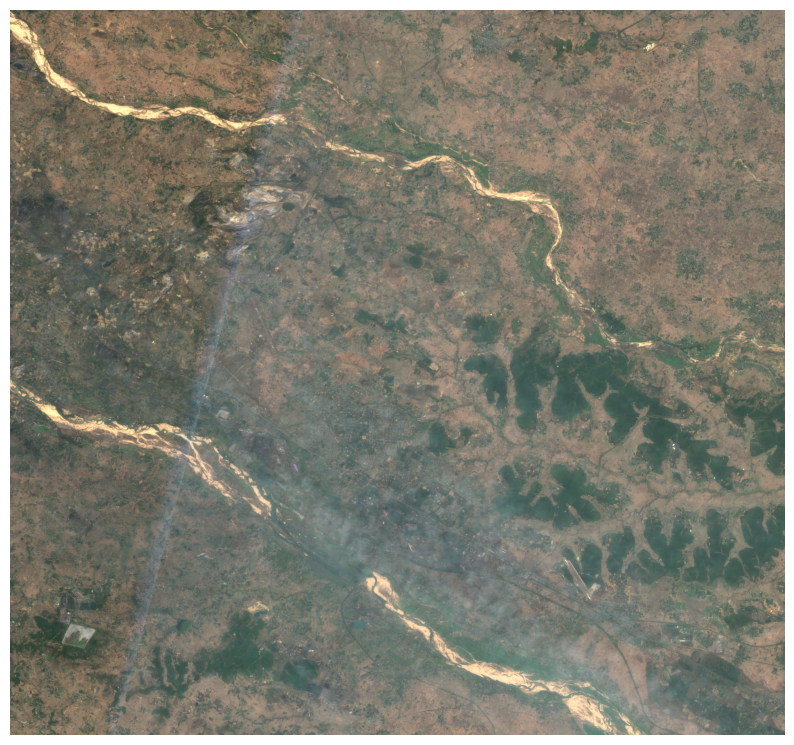

In [ ]:
plt.figure(figsize = [10,10])
plt.imshow(rgb*4)
plt.axis('off')

In [ ]:
samples = gpd.read_file('/content/drive/MyDrive/2018_Classification/new2.shp')

In [ ]:
samples

Class  LULC_Point  LULC_Poi_1  LULC_Poi_2  LULC_Poi_3  LULC_Poi_4  \
0        0      0.1126      0.1180     0.12260      0.1208      0.1262   
1        0      0.1126      0.1180     0.12260      0.1208      0.1262   
2        0      0.1126      0.1180     0.12260      0.1208      0.1262   
3        0      0.1126      0.1180     0.12260      0.1208      0.1262   
4        0      0.1126      0.1180     0.12260      0.1208      0.1262   
..     ...         ...         ...         ...         ...         ...   
237      6      0.1133      0.1159     0.12195      0.1196      0.1379   
238      6      0.1133      0.1159     0.12195      0.1196      0.1379   
239      6      0.1133      0.1159     0.12195      0.1196      0.1379   
240      6      0.1133      0.1159     0.12195      0.1196      0.1379   
241      6      0.1133      0.1159     0.12195      0.1196      0.1379   

     LULC_Poi_5  LULC_Poi_6  LULC_Poi_7  LULC_Poi_8  LULC_Poi_9  LULC_Poi10  \
0       0.13520      0.1421     0.15105     0.14175      0.1547     0.14480   
1       0.13520      0.1421     0.15105     0.14175      0.1547     0.14480   
2       0.13520      0.1421     0.15105     0.14175      0.1547     0.14480   
3       0.13520      0.1421     0.15105     0.14175      0.1547     0.14480   
4       0.13520      0.1421     0.15105     0.14175      0.1547     0.14480   
..          ...         ...         ...         ...         ...         ...   
237     0.17175      0.1843     0.19555     0.18945      0.2018     0.17875   
238     0.17175      0.1843     0.19555     0.18945      0.2018     0.17875   
239     0.17175      0.1843     0.19555     0.18945      0.2018     0.17875   
240     0.17175      0.1843     0.19555     0.18945      0.2018     0.17875   
241     0.17175      0.1843     0.19555     0.18945      0.2018     0.17875   

     LULC_Poi11 LULC_Poi12 LULC_Poi13                   geometry  
0       0.12645       test   Build up  POINT (87.30658 23.53697)  
1       0.12645       test   Build up  POINT (87.30349 23.54137)  
2       0.12645       test   Build up  POINT (87.30220 23.54688)  
3       0.12645       test   Build up  POINT (87.28135 23.54790)  
4       0.12645       test   Build up  POINT (87.28255 23.55514)  
..          ...        ...        ...                        ...  
237     0.14075       test       Road  POINT (87.40092 23.47771)  
238     0.14075       test       Road  POINT (87.39878 23.47910)  
239     0.14075       test       Road  POINT (87.39706 23.48003)  
240     0.14075       test       Road  POINT (87.39551 23.48097)  
241     0.14075       test       Road  POINT (87.39189 23.48290)  

[242 rows x 16 columns]

In [ ]:
samples = samples.to_crs('EPSG:4326')
print(samples.crs)

EPSG:4326


In [ ]:
cmap = ListedColormap([  '#c92a0d' , '#00ffff' , '#98ff00' , '#e76cdc' , '#ffc82d' , '#887e27' , '#cbc4d6'])

<Axes: >

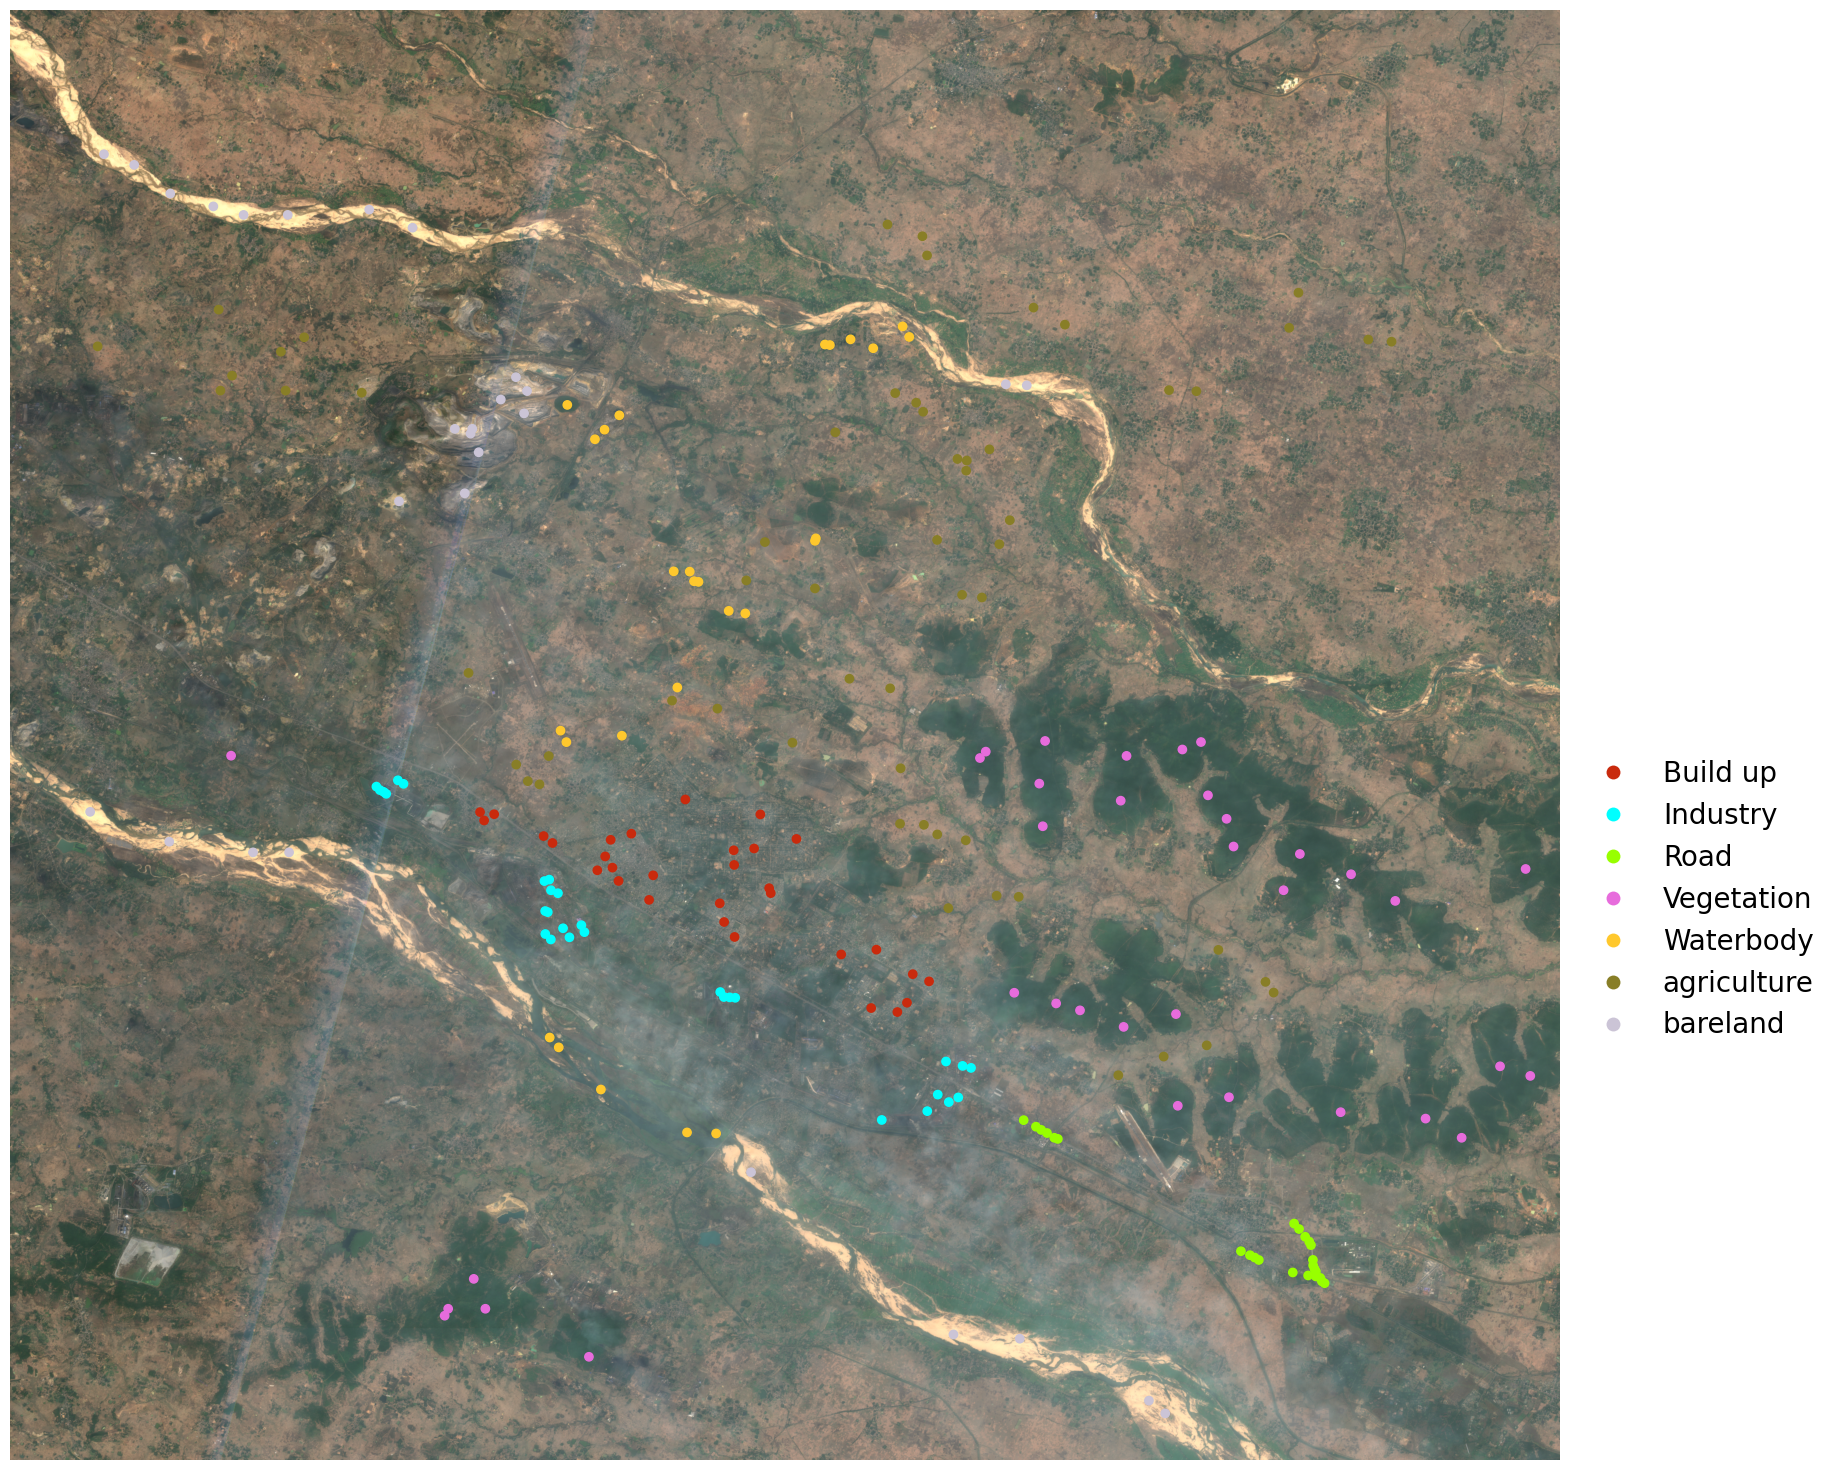

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))
samples.plot(column='LULC_Poi13', categorical=True, cmap=cmap, legend=True, legend_kwds={'bbox_to_anchor': (1, 0.5), 'loc': 'upper left', 'fontsize': 20, 'frameon': False}, ax=ax)
ax.axis('off')
show(rgb.transpose([2, 0, 1]) * 4, transform=src.transform, ax=ax)

In [ ]:
samples['geometry']

0      POINT (87.30658 23.53697)
1      POINT (87.30349 23.54137)
2      POINT (87.30220 23.54688)
3      POINT (87.28135 23.54790)
4      POINT (87.28255 23.55514)
                 ...            
237    POINT (87.40092 23.47771)
238    POINT (87.39878 23.47910)
239    POINT (87.39706 23.48003)
240    POINT (87.39551 23.48097)
241    POINT (87.39189 23.48290)
Name: geometry, Length: 242, dtype: geometry

In [ ]:
import numpy as np

# Read all bands at once
src_array = np.stack([src.read(i+1) for i in range(src.count)], axis=0)

array_samples = []
for point in samples['geometry']:
  minx, miny, maxx, maxy = point.bounds
  # x = (minx + maxx) / 2
  # y = (miny + maxy) / 2
  x = point.xy[0][0]
  y = point.xy[1][0]
  row, col = src.index(x, y)
  band_values = src_array[:, row, col]
  array_samples.append(band_values)

In [ ]:
X = np.array(array_samples)
X.shape

(242, 12)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, cohen_kappa_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [ ]:
samples['LULC_Poi13']

0      Build up
1      Build up
2      Build up
3      Build up
4      Build up
         ...   
237        Road
238        Road
239        Road
240        Road
241        Road
Name: LULC_Poi13, Length: 242, dtype: object

In [ ]:
Y = samples['LULC_Poi13'].values

In [ ]:
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(Y)
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y , test_size = 0.3 , random_state = 42)
clf = xgb.XGBClassifier(objective = "multi:softprob" , random_state = 42 , verbosity = 3 ,n_estimators = 500 , max_depth = 10 , n_thread = 8, n_jobs = 8 , learning_rate = 0.01)
clf.fit(x_train , y_train)

[10:08:39] ======== Monitor (0): HostSketchContainer ========
[10:08:39] AllReduce: 0.000269s, 1 calls @ 269us

[10:08:39] MakeCuts: 0.000397s, 1 calls @ 397us

[10:08:39] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 0


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:08:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_thread" } are not used.

  warnings.warn(smsg, UserWarning)


[10:08:50] ======== Monitor (0): Learner ========
[10:08:50] Configure: 0.027959s, 1 calls @ 27959us

[10:08:50] EvalOneIter: 0.01203s, 500 calls @ 12030us

[10:08:50] GetGradient: 0.10166s, 500 calls @ 101660us

[10:08:50] PredictRaw: 0.001058s, 500 calls @ 1058us

[10:08:50] UpdateOneIter: 11.0191s, 500 calls @ 11019086us

[10:08:50] ======== Monitor (0): GBTree ========
[10:08:50] BoostNewTrees: 10.8815s, 500 calls @ 10881453us

[10:08:50] CommitModel: 0.001551s, 500 calls @ 1551us

[10:08:50] ======== Monitor (0): HistUpdater ========
[10:08:50] BuildHistogram: 3.76051s, 13839 calls @ 3760515us

[10:08:50] EvaluateSplits: 2.56649s, 17339 calls @ 2566490us

[10:08:50] InitData: 0.352147s, 3500 calls @ 352147us

[10:08:50] InitRoot: 1.44542s, 3500 calls @ 1445417us

[10:08:50] LeafPartition: 0.001959s, 3500 calls @ 1959us

[10:08:50] UpdatePosition: 2.45353s, 13839 calls @ 2453532us

[10:08:50] UpdatePredictionCache: 0.327814s, 3500 calls @ 327814us

[10:08:50] UpdateTree: 10.1902s, 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=8, n_thread=8,
              num_parallel_tree=None, ...)

In [ ]:
print("Accuracy on training set: {:.2f}".format(clf.score(x_train, y_train)))
print("Accuracy on test set: {:.2f}".format(clf.score(x_test, y_test)))

[10:10:06] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 0
Accuracy on training set: 1.00
Accuracy on test set: 0.81


In [ ]:
y_predict = clf.predict(x_test)
print(classification_report(y_test , y_predict))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.60      0.55      0.57        11
           2       0.55      0.75      0.63         8
           3       1.00      1.00      1.00        12
           4       1.00      0.60      0.75         5
           5       0.94      0.94      0.94        17
           6       0.73      0.80      0.76        10

    accuracy                           0.81        73
   macro avg       0.81      0.78      0.79        73
weighted avg       0.82      0.81      0.81        73



In [ ]:
c_matrix = confusion_matrix(y_test , y_predict)

Text(0.5, 58.7222222222222, 'Predict')

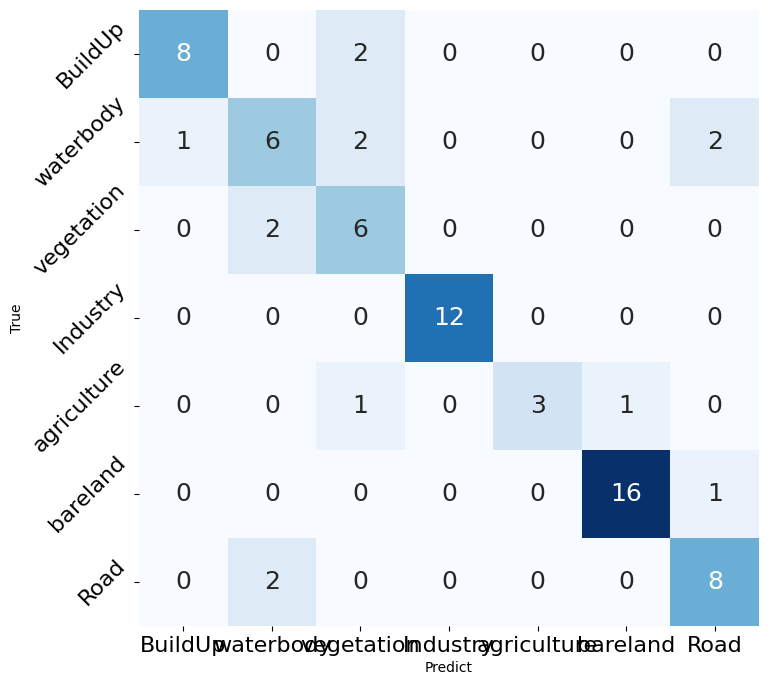

In [ ]:
names = ['BuildUp' , 'waterbody' , 'vegetation'  , 'Industry' , 'agriculture' , 'bareland' , 'Road']
r1 = pd.DataFrame(data = c_matrix , index = names , columns = names)
fig, ax = plt.subplots(figsize = (8,8))
ax = sns.heatmap(r1 , annot = True , annot_kws ={"size": 18}, fmt = 'd' , cmap = "Blues" , cbar = False)
ax.tick_params(labelsize = 16)
ax.set_yticklabels(names, rotation=45)
ax.set_ylabel('True')
ax.set_xlabel('Predict')

In [ ]:
Predict_img = np.nan_to_num(img)
Predict_img

array([[[0.07135, 0.06725, 0.08395, ..., 0.2277 , 0.17425, 0.1097 ],
        [0.0657 , 0.065  , 0.08005, ..., 0.2205 , 0.1612 , 0.1023 ],
        [0.0657 , 0.065  , 0.08005, ..., 0.2205 , 0.1612 , 0.1023 ],
        ...,
        [0.10505, 0.1086 , 0.1288 , ..., 0.2373 , 0.3137 , 0.25475],
        [0.09975, 0.1127 , 0.1314 , ..., 0.2168 , 0.31095, 0.2477 ],
        [0.09975, 0.1134 , 0.1326 , ..., 0.2168 , 0.31095, 0.2477 ]],

       [[0.07135, 0.0697 , 0.086  , ..., 0.2277 , 0.17425, 0.1097 ],
        [0.0657 , 0.0677 , 0.085  , ..., 0.2205 , 0.1612 , 0.1023 ],
        [0.0657 , 0.0677 , 0.085  , ..., 0.2205 , 0.1612 , 0.1023 ],
        ...,
        [0.10505, 0.11405, 0.1304 , ..., 0.2373 , 0.3137 , 0.25475],
        [0.09975, 0.11025, 0.1308 , ..., 0.2168 , 0.31095, 0.2477 ],
        [0.09975, 0.10975, 0.1294 , ..., 0.2168 , 0.31095, 0.2477 ]],

       [[0.07135, 0.07085, 0.08645, ..., 0.2277 , 0.1894 , 0.11765],
        [0.0657 , 0.0699 , 0.08735, ..., 0.2205 , 0.171  , 0.10955],
    

In [ ]:
Predict_img.shape

(4764, 5092, 12)

In [ ]:
Predict_img = Predict_img.reshape(img.shape[0]*img.shape[1] , img.shape[2])
Predict_img

array([[0.07135, 0.06725, 0.08395, ..., 0.2277 , 0.17425, 0.1097 ],
       [0.0657 , 0.065  , 0.08005, ..., 0.2205 , 0.1612 , 0.1023 ],
       [0.0657 , 0.065  , 0.08005, ..., 0.2205 , 0.1612 , 0.1023 ],
       ...,
       [0.08255, 0.0836 , 0.087  , ..., 0.20865, 0.13675, 0.0728 ],
       [0.08025, 0.0826 , 0.0857 , ..., 0.22025, 0.1338 , 0.0712 ],
       [0.08025, 0.0829 , 0.08795, ..., 0.22025, 0.1338 , 0.0712 ]])

In [ ]:
array_pred = clf.predict(Predict_img)
array_pred = array_pred.reshape(img.shape[0] , img.shape[1])
array_pred

array([[3, 3, 3, ..., 5, 5, 5],
       [3, 3, 3, ..., 5, 5, 5],
       [5, 3, 3, ..., 5, 5, 5],
       ...,
       [5, 5, 5, ..., 3, 3, 3],
       [5, 5, 5, ..., 3, 3, 3],
       [5, 5, 5, ..., 3, 3, 3]])

(-0.5, 5091.5, 4763.5, -0.5)

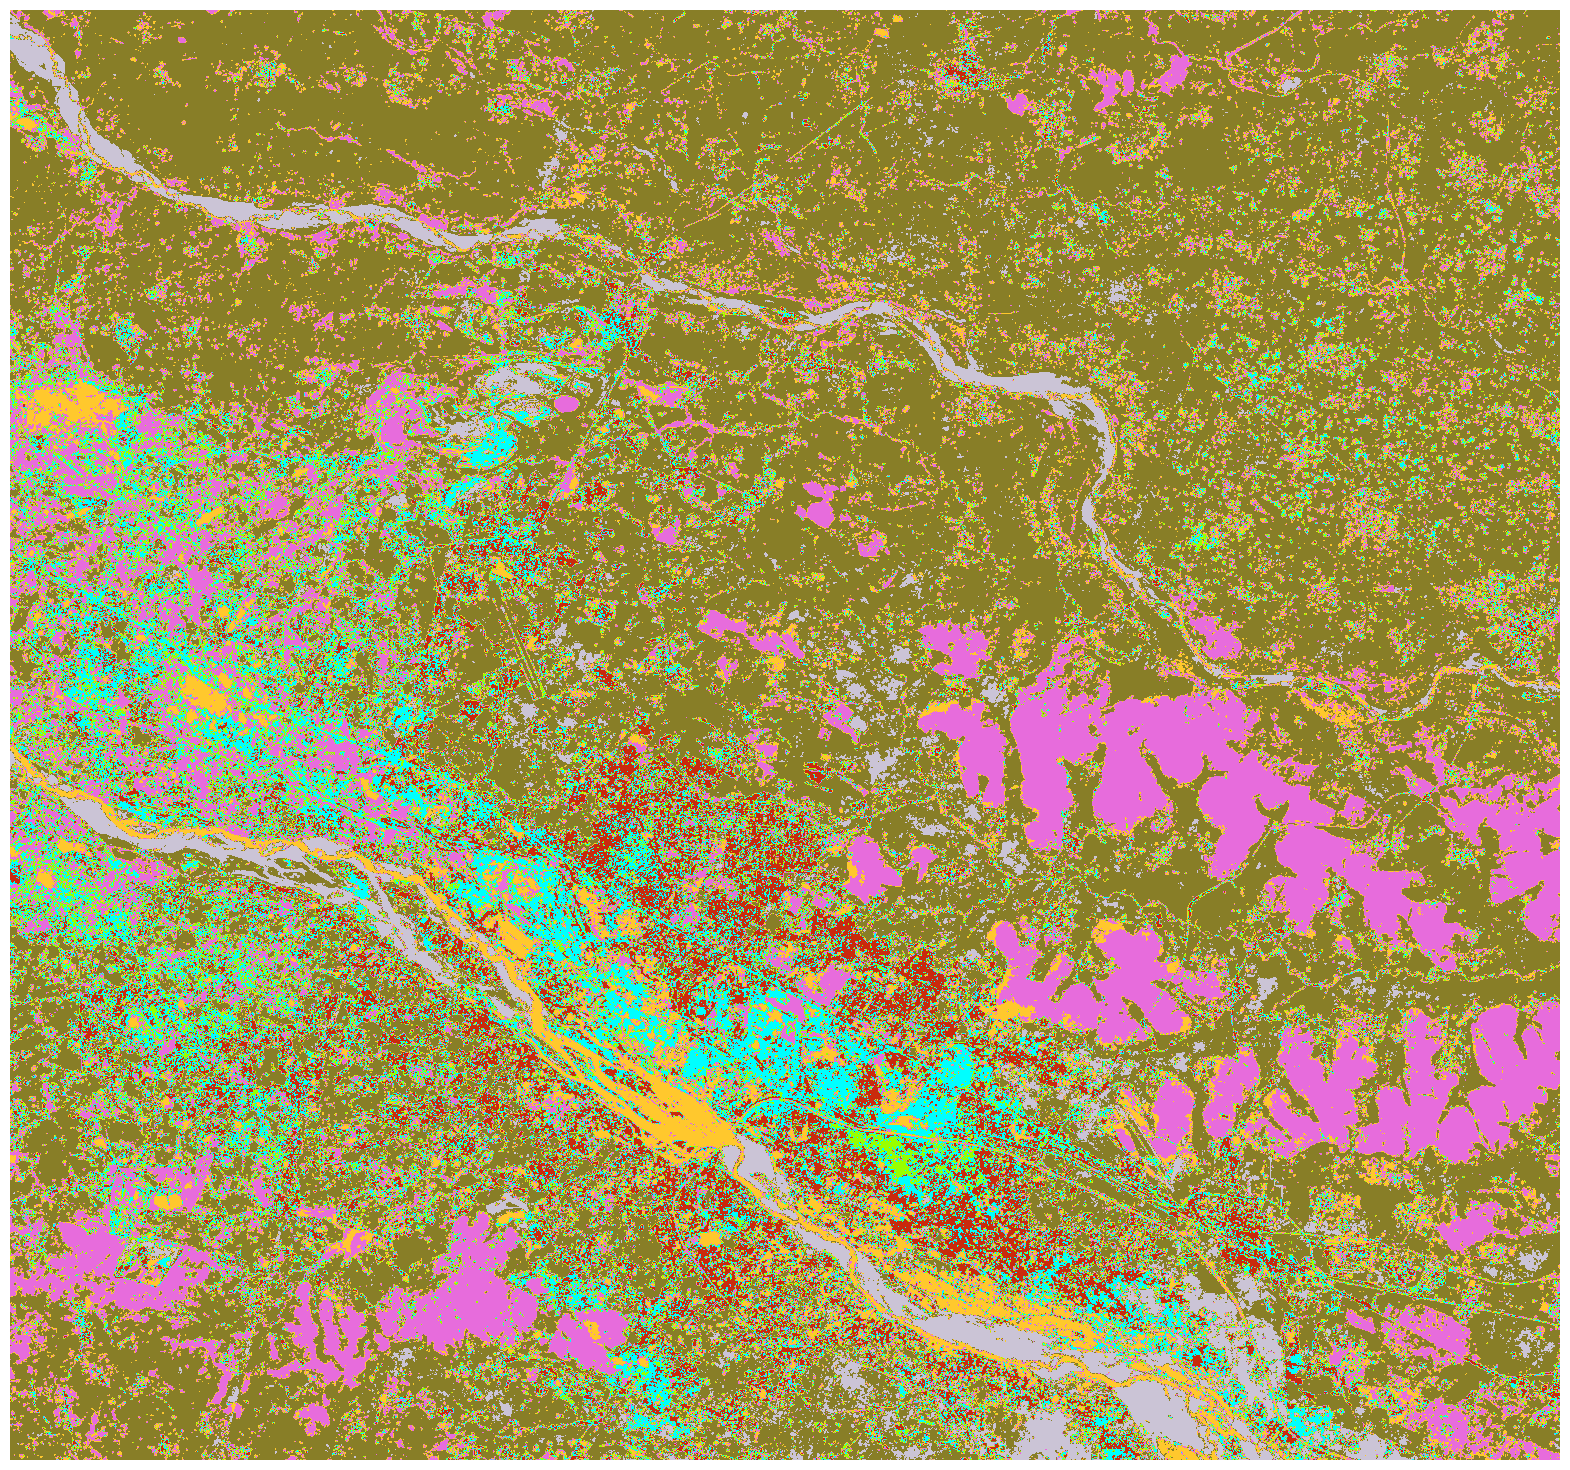

In [ ]:
plt.figure(figsize = [20,20])
plt.imshow(array_pred , cmap = cmap)
plt.axis('off')

In [ ]:
classes, quantity = np.unique(array_pred , return_counts = True)

In [ ]:
quantity

array([ 3404428,   999861,   668360,  3844841,  1699755, 12736360,
         904683])

In [ ]:
areas = quantity*400/1000000

In [ ]:
data_stack = np.stack((classes, quantity, areas , names))

In [ ]:
data_stack

array([['0', '1', '2', '3', '4', '5', '6'],
       ['3404428', '999861', '668360', '3844841', '1699755', '12736360',
        '904683'],
       ['1361.7712', '399.9444', '267.344', '1537.9364', '679.902',
        '5094.544', '361.8732'],
       ['BuildUp', 'waterbody', 'vegetation', 'Industry', 'agriculture',
        'bareland', 'Road']], dtype='<U32')

In [ ]:
df_data = pd.DataFrame(data = data_stack.T , columns = ['Codes' , 'Qtd' , 'Area sq.km' , 'Classes'])

In [ ]:
df_data['Area sq.km'] = df_data['Area sq.km'].astype(float)

In [ ]:
df_data

Codes       Qtd  Area sq.km      Classes
0     0   3404428   1361.7712      BuildUp
1     1    999861    399.9444    waterbody
2     2    668360    267.3440   vegetation
3     3   3844841   1537.9364     Industry
4     4   1699755    679.9020  agriculture
5     5  12736360   5094.5440     bareland
6     6    904683    361.8732         Road

<ipython-input-45-c24d29593d13>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x = 'Classes' , y = 'Area sq.km' , data = df_data , palette = cmap.colors)


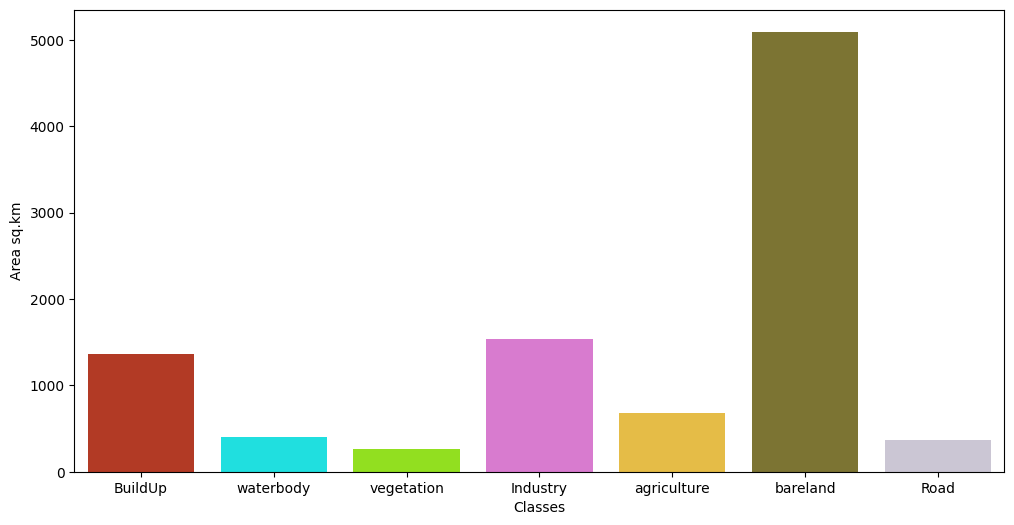

In [ ]:
fig , ax1 = plt.subplots(figsize = (12,6))
ax1 = sns.barplot(x = 'Classes' , y = 'Area sq.km' , data = df_data , palette = cmap.colors)